<a href="https://colab.research.google.com/github/Kostiancheck/optimization_method/blob/main/%D0%9A%D1%83%D1%80%D1%81%D0%BE%D0%B2%D0%B0_%D1%80%D0%BE%D0%B1%D0%BE%D1%82%D0%B0_%D1%81%D1%82%D1%83%D0%B4%D0%B5%D0%BD%D1%82%D0%B0_%D0%B3%D1%80%D1%83%D0%BF%D0%B8_%D0%9A%D0%9C_81_%D0%93%D0%BE%D1%80%D0%B1%D0%B0%D1%87%D0%B0_%D0%9A%D0%BE%D1%81%D1%82%D1%8F%D0%BD%D1%82%D0%B8%D0%BD%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<left>
    <img src="https://kpi.ua/files/images/kpi.png" width="300" alt="kpi logo"  />
</left>

## Курсова робота на тему "Метод спряженого градієнта Флетчера-Рівса"
### студента групи КМ-81 Горбач Костянтин


### Зміст

1. Постановка задачі
2. Вступ
3. Теоретичні відомості
4. Вирішення поставленої задачі
    * Імпорт бібліотек
    * Визначення необхідних функцій та змінних
    * Розрахунки
5. Висновок
6. Список літератури

### Постановка задачі




Дослідити збіжність метода Флетчера-Рівса при мінімізації кореневої функції  в залежності від:

1. Величини кроку h при обчисленні похідних
2. Схеми обчислення похідних
3. Виду методу одновимірного пошуку (ДСК-Пауелла або Золотого перетину)
4. Точності методу одновимірного пошуку
5. Значення параметру в алгоритмі Свена
6. Вигляду критерія закінчення
7. Наявності рестартів
8. Порівняти з модифікацією Полака-Ріб’єра

Використати метод штрафних функцій (метод внутрішньої точки) для умовної оптимізації в залежності від:
1. Розташування локального мінімума (всередині/поза допустимою областю).
2. Виду допустимої області (випукла/невипукла).


### Вступ

Метод Флетчера-Рівса для обчислень використовує лише похідні першого порядку та будує систему h-спряжених напрямків (тобто кожен наступний напрямок h-спряжений до попереднього). Основною ідеєю цього методу є побудова системи напрямків, що починається як система напрямків найшвидшого спуску і переходить в систему напрямків по методу Ньютона

### Теоретичні відомості


#### Алгоритм методу


---



---


Задана початкова точка $x^{(0)}$ та параметр закінчення $\varepsilon$.

1. Знайти градієнт $\nabla f(x^{(k)})$ та норму градієнта $\|\nabla f(x^{(k)})\|$
2. Обчислити $\lambda_{k}$ методом одномірного пошуку
3. Обчислити напрямок пошуку
  * Початковий напрямок пошуку дорівнює антіградієнту: $S^{(0)} = -\nabla f(x^{(0)})$
  * Усі наступні напрямки: $S^{(k)} = -\nabla f(x^{(k)}) + S^{(k-1)}\frac{\|\nabla f(x^{(k)})\|^{2}}{\|\nabla f(x^{(k-1)})\|^{2}}$
4. Обчислити наступну точку $x^{k+1}=x^{k} + \lambda_{k}S^{(k)}$
4. Обчислити $f(x^{k}), \Delta f(x^{k})$
5. Перевірити виконання одного з критеріїв закінчення:
  1.   \begin{cases}
     \frac{\|x^{(k+1)}-x^{(k)}\|}{\|x^{(k)}\|} \le \varepsilon
     \\
   |f(x^{(k+1)}) - f(x^{(k)})| \le \varepsilon.
   \end{cases}
  2. $\|S^{(k)} \le \varepsilon\|$

### Вирішення поставленої задачі


#### Імпорт бібліотек

In [2]:
import numpy as np

#### Визначення необхідних функцій та змінних

Глобальні змінні:

In [3]:
calls_of_functions = 0
derivative_calculation_step = 0.00001
left_gold_section=0.382
right_gold_section=0.618

Коренева функція: $f(x) = (10(x_1 - x_2)^{2} + (x_1 - 1)^{2})^{\frac{1}{4}}$




In [4]:
def fun(x: list):
  global calls_of_functions
  calls_of_functions += 1
  return (10*(x[0] - x[1])**2 + (x[0]-1)**2)**(1/4)

 Функція для знаходження $x^{(k+1)}$:

In [5]:
def calculate_x(x0, S, grad, lmb):
    lmbA = np.dot(lmb, S)
    lmbAgrad = np.dot(lmbA, grad)
    calc = x0 - lmbAgrad
    return calc

 Функції для визначення похідних методами правих, лівих та центральних кінцевих різниць:
 

In [6]:
def derivative(x, n): 
    h = []
    for i in range(len(x)):
        if i == n:
            h.append(derivative_calculation_step)  
        else:
            h.append(0) 
    return (fun([x[0] + h[0], x[1] + h[1]]) - fun([x[0] - h[0], x[1] - h[1]])) / (
            2 * h[n]
    )


def derivative_right(x, n):
    h = []
    for i in range(len(x)):
        if i == n:
            h.append(derivative_calculation_step)
        else:
            h.append(0)
    return (fun([x[0] + h[0], x[1] + h[1]]) - fun([x[0], x[1]])) / (h[n])


def derivative_left(x, n):
    h = []
    for i in range(len(x)):
        if i == n:
            h.append(derivative_calculation_step)
        else:
            h.append(0)
    return (fun([x[0], x[1]]) - fun([x[0] - h[0], x[1] - h[1]])) / (h[n])

Функції для знаходження градієнту та норми градієнту:

In [7]:
def gradient(x):
    grad = []
    for i in range(len(x)):
        grad.append(derivative(x, i))
    return grad


def norm(v):
    return np.linalg.norm(v)

def find_deltas(S, x0, x1):
    deltag = np.array(sub(gradient(x1), gradient(x0)))[np.newaxis]
    deltax = sub(x1, x0)

    deltax = np.array(deltax)[np.newaxis]
    deltaxT = np.array(deltax).T
    deltagT = np.array(deltag).T

    deltax, deltaxT = deltaxT, deltax
    deltag, deltagT = deltagT, deltag

    first = np.dot(deltax, deltaxT)
    second = np.dot(deltaxT, deltag)
    resOne = first / second

    first = np.dot(S, deltag)
    second = np.dot(first, deltagT)
    third = np.dot(second, S)
    temp = third

    first = np.dot(deltagT, S)
    second = np.dot(first, deltag)

    resTwo = temp / second
    return resOne, resTwo

Функція що реалізує алгоритм Свена

$x_{k+1} = x_k \pm \Delta*2^{k}$ - формула для знаходження інтервалу невизначенності

In [8]:
def svenn(x0, grad, lmb, delta, S):
    f0 = fun(calculate_x(x0, S, grad, lmb))
    if f0 < fun(
            calculate_x(x0, S, grad, lmb + delta)
    ): 
        delta = -delta
    x1 = lmb + delta
    f1 = fun(calculate_x(x0, S, grad, x1))
    while f1 < f0:
        delta *= 2
        lmb = x1
        x1 = lmb + delta
        f0 = f1
        f1 = fun(calculate_x(x0, S, grad, x1))
    a = lmb + delta / 2
    b = lmb - delta / 2
    f0 = fun(calculate_x(x0, S, grad, lmb))
    f1 = fun(calculate_x(x0, S, grad, b))

    if f0 < f1:
        if a < b:
            return [a, b]
        else:
            return [b, a]
    elif f1 < f0:
        if lmb < x1:
            return [lmb, x1]
        else:
            return [x1, lmb]
    else:
        if lmb < b:
            return [lmb, b]
        else:
            return [b, lmb]

Метод ДСК-Паула

Алгоритм:
обчислюємо мінімум апроксимуючого поліному:
$ x^* = x^b + \frac{\Delta x (f(x^a)-f(x^c))}{2(f(x^a) - 2f(x^b) +f(x^c))}$
доти, доки не виконається одна з умов закінчення пошуку:

  $|f(x_2) - f(x_m)| \le \varepsilon$

  $ |x_2-x_m| \le \varepsilon$


In [9]:
def dscPowell(x0, grad, eps, lmb, delta, S):
    svenn_res = svenn(x0, grad, lmb, delta, S)
    a = svenn_res[0]
    b = svenn_res[1]
    xmin = (a + b) / 2
    f1 = fun(calculate_x(x0, S, grad, a))
    f2 = fun(calculate_x(x0, S, grad, xmin))
    f3 = fun(calculate_x(x0, S, grad, b))
    xApprox = xmin + ((b - xmin) * (f1 - f3)) / (
            2 * (f1 - 2 * f2 + f3)
    )

    while (abs(xmin - xApprox) >= eps or 
           abs(fun(calculate_x(x0, S, grad, xmin)) - 
               fun(calculate_x(x0, S, grad, xApprox)))>= eps):
        if xApprox < xmin:
            b = xmin
        else:
            a = xmin
        xmin = xApprox
        funcRes = [
            fun(calculate_x(x0, S, grad, a)),
            fun(calculate_x(x0, S, grad, xmin)),
            fun(calculate_x(x0, S, grad, b)),
        ]
        a1 = (funcRes[1] - funcRes[0]) / (xmin - a)
        a2 = ((funcRes[2] - funcRes[0]) / (b - a) - a1) / (b - xmin)
        xApprox = (a + xmin) / 2 - a1 / (2 * a2)
    return xmin

Функція золотого перерізу:

\begin{cases}
     x_1=a+0.382L
     \\
    x_2=a+0.618L
   \end{cases}


In [10]:
def gold(a, b, eps, x0, grad, S):
    l = b - a
    x1 = a + l * left_gold_section
    x2 = a + l * right_gold_section
    while l > eps:
        if fun(calculate_x(x0, S, grad, x1)) < fun(calculate_x(x0, S, grad, x2)):
            b = x2
            x2 = x1
            l = b - a
            x1 = a + l * left_gold_section
        else:
            a = x1
            x1 = x2
            l = b - a
            x2 = a + l * right_gold_section
    print(f"Інтервал методом ЗП: [{round(a, 4)},{round(b, 4)}]")
    return [a, b]


def golden_lambda(x0, grad, eps, lmb, S):
    line = svenn(x0, grad, lmb, 0.1, S)
    line = gold(line[0], line[1], eps, x0, grad, S)
    lmb = (line[0] + line[1]) / 2
    return lmb

Допоміжні функції:

In [14]:
def add(x, y):
    res = []
    for i in range(len(x)):
        res.append(x[i] + y[i])
    return res


def sub(x, y):
    res = []
    for i in range(len(x)):
        res.append(x[i] - y[i])
    return res


def mults(x, n):
    res = []
    for i in range(len(x)):
        res.append(x[i] * n)
    return res


def print_summary(calls_of_functions, iteration, restart, S, x, func_name):
    print(f"Кількість ітерацій у {func_name} - {iteration}")
    print(f"Кількість рестартів у {func_name} - {restart}")
    print(f"Кількість викликів функції у {func_name} - {calls_of_functions}")


def print_interim_results(x, iteration):
    print(f"{iteration}) наступна точка: {x}")

Функція, що реалізує метод Флетчера-Рівса:

In [17]:
def fr(x0: list, eps):
    restart = 0
    iteration = 1
    lmb = 0.01

    print(x0)
    print("------------------------")
    grad = gradient(x0)
    S = anti_grad(grad)
    S_norm = norm(S)

    while not S_norm <= eps:

        lmb = dscPowell(x0, eps, lmb, S, 0.01)
        if lmb < 0:
            print("Рестарт")
            S = anti_grad(grad)
            restart += 1

        x1 = calculate_x(x0, S, lmb)

        previous_grad = grad
        previous_grad_norm = norm(previous_grad)
        grad = gradient(x1)
        grad_norm = norm(grad)
        previous_S = S
        S = anti_grad(grad) + np.dot(previous_S, grad_norm ** 2 / previous_grad_norm ** 2)
        S_norm = norm(S)

        x0 = x1
        print_interim_results(x0, calls_of_functions, iteration, first_dimension_search_func.__name__)
        print("\n")
        iteration += 1

    print(f"Мінімум функціі: {x1}")

#### Розрахунки

In [18]:
fr([-1.2, 0.0], 0.00001)

# обнуляємо параметри перед наступним запуском
calls_of_functions = 0
derivative_calculation_step = 0.00001
left_gold_section=0.382
right_gold_section=0.618


[-1.2, 0.0]
------------------------
1) наступна точка: [-0.50448118 -0.58776238]


2) наступна точка: [ 0.18603068 -0.09628955]


3) наступна точка: [1.1885161  1.01537256]


4) наступна точка: [1.37575447 1.31052537]


5) наступна точка: [1.19964066 1.23469815]


6) наступна точка: [1.04335715 1.09226692]


7) наступна точка: [0.9417155 0.9638368]


8) наступна точка: [0.93824352 0.93926278]


9) наступна точка: [0.97704547 0.96810332]


10) наступна точка: [1.003964   0.99644287]


11) наступна точка: [1.01289468 1.01075452]


12) наступна точка: [1.00880229 1.00991089]


13) наступна точка: [1.00161046 1.00337539]


14) наступна точка: [0.99791843 0.99890008]


15) наступна точка: [0.99769199 0.99774782]


16) наступна точка: [0.9989775  0.99864179]


17) наступна точка: [1.00011856 0.99982969]


18) наступна точка: [1.00049559 1.0003978 ]


19) наступна точка: [1.00034382 1.00038215]


20) наступна точка: [1.00007761 1.0001461 ]


21) наступна точка: [0.99992672 0.99996914]


22) 

### Висновок:


У ході виконання курсової роботи був запрограмований та проаналізований метод спряженого градієнта Флетчера-Рівса. 

Аналіз полягав у порівнянні швидкості методу в залежності від різних параметрів. У ході аналізу були отримані наступні дані:

1. Оцінка збіжності в залежності від величини кроку при обчислені похідних:

* Схема обчислення похідних – центральна
* Метод одновимірного пошуку – ДСК-Пауелла
* Точність методу одновимірного пошуку – 0.01
* Параметр у алгоритмі Свенна – 0.01
* Точність методу – 0.001

Величина кроку обчислення похідних  | Викликів функції | Знайдена точка
------------- | ------------- | ------------
0.01  | 530 | [1.00000299 1.00000232]
0.0001  | 884 | [0.99999998 0.99999998]
**0.000001**  | **1241** | **[1. 1.]**

2. Оцінка збіжності в залежності від схеми обчислення похідних
* Крок обчислення похідних – 0.000001
* Метод одновимірного пошуку – ДСК-Пауелла
* Точність методу одновимірного пошуку – 0.1
* Параметр у алгоритмі Свенна – 0.01
* Точність методу – 0.001

Схема обчислення похідних  | Викликів функції | Знайдена точка
------------- | ------------- | ------------
**Центральна**  |  **1241** | **[1. 1.]**
Ліва  | 1350 |  [0.99999998 0.99999998]
Права  | 1420 |  [0.99999987 0.9999999]

3. Оцінка залежності збіжності функції від методу одновимірного пошуку

* Крок обчислення похідних – 0.000001
* Схема обчислення похідних – центральна
* Точність методу одновимірного пошуку – 0.1
* Параметр у алгоритмі Свенна – 0.1
* Точність методу – 0.001

Метод одновимірного пошуку  | Викликів функції | Знайдена точка
------------- | ------------- | ------------
**ДСК Пауелла**  | **1241** | **[1. 1.]**
Золотий перетин  | 1749 |  **[1. 1.]**


4. Оцінка залежності збіжності функції від точності методу одновимірного пошуку

* Крок обчислення похідних – 0.00001
* Схема обчислення похідних – центральна
* Метод одновимірного пошуку – ДСК-Пауелла
* Параметр у алгоритмі Свенна – 0.1
* Точність методу – 0.001

Точність одновимірного пошуку  | Викликів функції | Знайдена точка
------------- | ------------- | ------------
**0.1**  | **1118** |  **[1. 1.]**
0.01  | 1241 |  [1. 1.]
0.0001  | 1432 |  [1. 1.]

* Крок обчислення похідних – 0.00001
* Схема обчислення похідних – центральна
* Метод одновимірного пошуку - ДСК-Пауелла 
* Точність методу одновимірного пошуку – 0.001
* Точність методу – 0.001

5. Оцінка залежності збіжності функції від значення параметру в алгоритмі Свенна

Значення параметру в алгоритмі Свена  | Викликів функції | Знайдена точка
------------- | ------------- | ------------
**0.1**  | **1241** | **[1. 1.]**
0.01  | 1241 | [1. 1.]
0.001  | 1325 | [1. 1.]



**Умовна оптимізація**: Задамо допустиму область так, аби в неї входила точка мінімуму, наприклад:
$-x^{2}-y^{2}+3 \ge 0$

Тоді штрафна функція набуде вигляду:

$ (1-x)^{2} + 100*(-x^{2}+y)^{2} + R(-x^{2}-y^{2}+3)$

**Точка лежить поза областю**

R | $X_1$ | $X_2$ | Кіл-сть викликів
--- | --- | ---- | ----
0.1 | 1.  | 1.   |  1241 |
1 | 1.00000001  |  1.00000001 | 884 |
5 | 1.00000299  |1.00000232 | 572 |


**Точка лежить в області**

R | $X_1$ | $X_2$ | Кіл-сть викликів
--- | --- | ---- | ----
0.1 | 1.  | 1.   |  862 |
1 |1.00000001  |  1.00000001 | 650 |
5 | 1.00000299  |1.00000232 | 728 |



Зробимо область невипуклою, покладанням додаткового обмеження:
$x_1^{2}+x_2^{2} - 0.7 \ge 0$

Тоді штрафна функція набуде вигляду:
$ (1-x)^{2} + 100*(-x^{2}+y)^{2} + R(-x^{2}-y^{2}+2.3) + R(x_1^{2}+x_2^{2} - 1.1)^{2}$

**Точка лежить поза областю**

R | $X_1$ | $X_2$ | Кіл-сть викликів
--- | --- | ---- | ----
0.1 | 1.  | 1.   |  1534 |
1 | 0.9999999   | 0.99999998 | 1420 |
5 | 0.9999872  |0.9999999 | 1748 |


**Точка лежить в області**

R | $X_1$ | $X_2$ | Кіл-сть викликів
--- | --- | ---- | ----
0.1 | 1.  | 1.   |  947 |
1 | 0.9999999   | 0.99999998 | 1036 |
5 | 0.9999872  |0.9999999 | 860 |

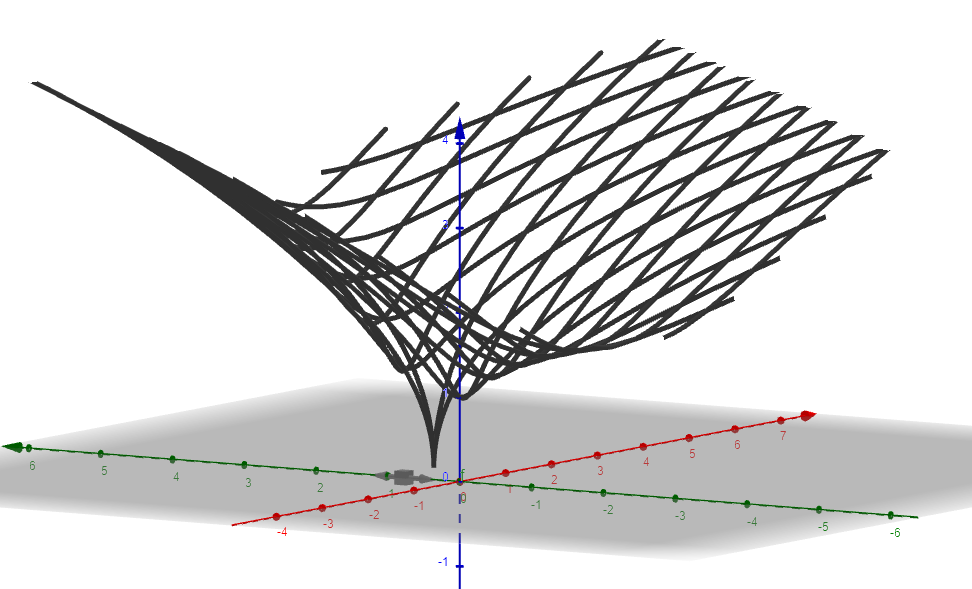

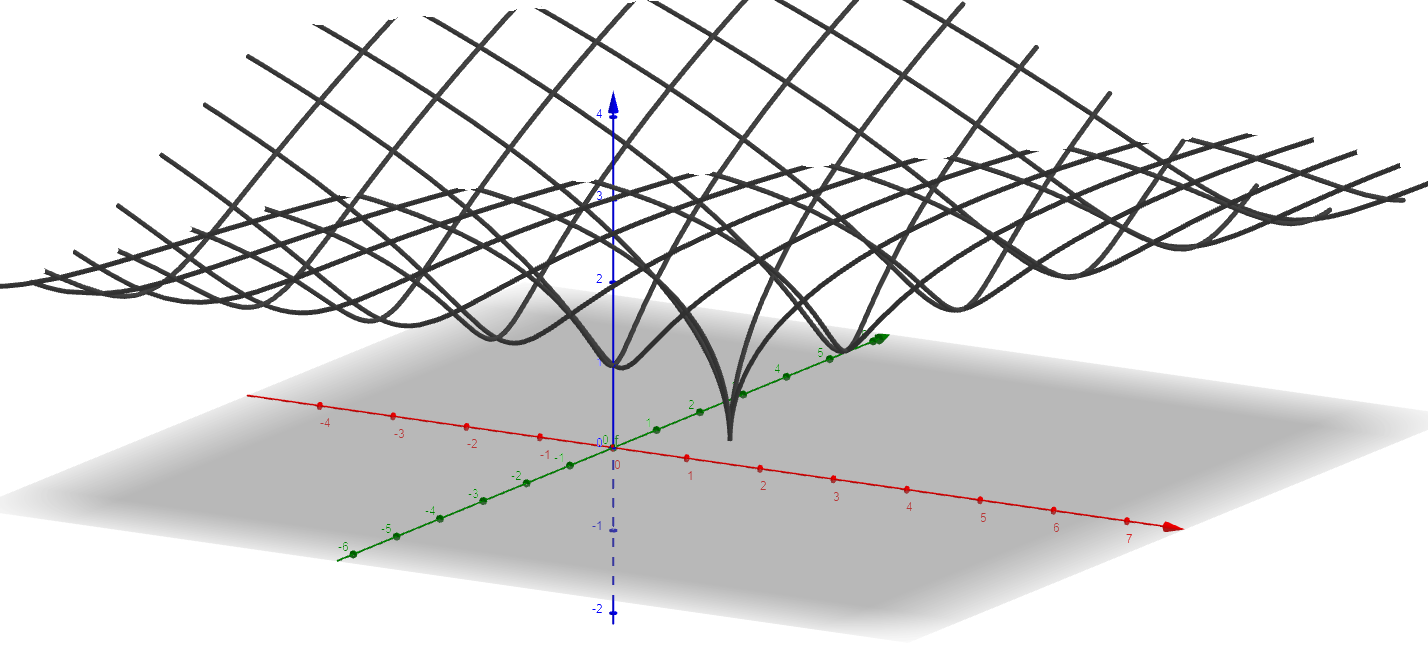

**Використавши онлайн калькулятор було побудовано графік кореневої функції, на якому видно, що мінімум функції знаходиться в точці (1; 1). Тобто дані, отримані програмно, є досить точними**

## Список літератури

1. Методи оптимізації. Рекомендації до виконання курсової роботи [Електронний
ресурс]: навч. посіб. для студ. спеціальності 113 «Прикладна математика»,
спеціалізації «Наука про дані та математичне моделювання» / Т. С. Ладогубець,
О. Д. Фіногенов; КПІ ім. Ігоря Сікорського. – Електронні текстові дані (1 файл: 180
Кбайт). – Київ: КПІ ім. Ігоря Сікорського, 2019. – 34 с
2. Лекція 7-8 з методів оптимізації
3. Відео-лекції